## Working on MNIST with Keras
- Applying CNN.

In [18]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix,accuracy_score
mnist = tf.keras.datasets.mnist

In [19]:
#Importing Keras Lib.
from keras.models import Sequential
from keras.layers import Flatten
from keras.layers import Dense
from keras.layers import Dropout , Activation , Conv2D , MaxPooling2D
from keras.preprocessing import image
%matplotlib inline

In [20]:
(x_train , y_train),(x_test,y_test)= mnist.load_data()
x_train , x_test = x_train/255.0 , x_test / 255.0#Normalisation

In [21]:
x_train.shape

(60000, 28, 28)

In [22]:
##Initantiang the model
model=Sequential()

In [23]:
#Convulational Layers
model.add(Conv2D(32,(3,3) , input_shape=(28,28,1),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(32,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))


In [24]:
## Flattening
model.add(Flatten()) #Here only 1d data can be fed.In CNN we can fed 2d.No neurons here.

model.add(Dense(units=64,activation='relu'))
model.add(Dense(units=10,activation='softmax'))

In [26]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 11, 11, 32)        9248      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 3, 3, 64)          18496     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 1, 1, 64)          0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 64)                0         
__________

In [28]:
#compiling
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [29]:
x_train=x_train.reshape((x_train.shape[0],x_train.shape[1],x_train.shape[2],1))
x_test=x_test.reshape((x_test.shape[0],x_test.shape[1],x_test.shape[2],1))

In [43]:
model.fit(x_test,y_test,epochs=1)

Epoch 1/1
10000/10000 [==============================] - 7s 724us/step - loss: 0.0276 - acc: 0.9898


In [44]:
model.evaluate(x_test,y_test)

10000/10000 [==============================] - 2s 230us/step


[0.01770564736863598, 0.9946]

### We are able to get a evaluation accuracy of 99.4%

In [45]:
#inference
test_image=x_test[2516]

In [46]:
test_image.shape

(28, 28, 1)

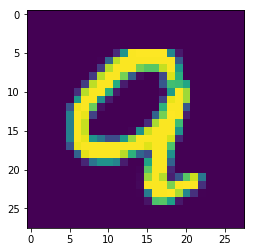

In [51]:
plt.imshow(test_image.reshape(28,28))

In [52]:
test_image = image.img_to_array(test_image)

In [53]:
#Predict expect a batch of images...we add a dummy dimension
test_image = test_image.reshape(1,28,28,1)

In [55]:
result=model.predict(test_image)

In [56]:
result

array([[1.0759953e-07, 1.4337107e-18, 6.6715167e-09, 3.6156427e-13,
        8.0185528e-12, 9.3533390e-14, 1.6264747e-13, 6.2643339e-09,
        2.0927815e-09, 9.9999988e-01]], dtype=float32)

In [57]:
np.around(result)

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]], dtype=float32)

In [58]:
(np.around(result)).argmax()

9